In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

In [2]:
base_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/global-shark-attack/records?limit=100'

In [3]:
requests.get(base_url) 

<Response [200]>

In [4]:
#request = (requests.get(base_url).json())

In [5]:
total_count = requests.get(base_url).json()['total_count']

In [6]:
#hold the data
all_of_the_data = []

In [7]:
for currentOffset in np.arange(0,total_count,100):
  # print(currentOffset)
  cur_data = requests.get(f'{base_url}&offset={currentOffset}').json()['results']
  all_of_the_data.extend(cur_data) #extend is like
  time.sleep(0.5)

In [8]:
len(all_of_the_data)

6890

In [9]:
all_of_the_data_df = pd.DataFrame(all_of_the_data)
all_of_the_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
0,2023-05-13,2023,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,...,Y,10h10,White shark,"B. Myatt & S. De Marchi, GSAF",None,None,None,None,None,None
1,2023-04-29,2023,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,None,...,N,11h20,1m shark,"The West Austalian, 4/30/2023",None,None,None,None,None,None
2,2022-10-07,2022,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,...,N,11h30,Bull shark,"ABC,net, 10/07/2022",None,None,None,None,None,None
3,2021-10-04,2021,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,...,N,None,None,"K. McMurray, TrackingSharks.com",2021.10.04-VanPatrick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.04,2021.10.04,6711
4,2021-10-03,2021,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,None,...,N,12h00,None,"CBS12, 10/3/2021",2021.10.03.b-JensenBeach.pdf1,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.03.b,2021.10.04.b,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,None,None,Sea Disaster,GREECE,Off Thessaly,None,Shipwrecked Persian Fleet,males,M,None,...,Y,None,None,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,493BC-PersianFleet,493BC,128
6886,None,None,Unprovoked,INDONESIA,Riau Province,"Natuna Islands, between Sumatra & Kalimantan i...",Swimming near anchored ship,a ship's engineer,M,None,...,Y,None,None,"C.H. Townsend, p. 172; V.M. Coppleson, p.258",ND-0054-NatunaIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0054,ND.0054,52
6887,None,None,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38
6888,None,None,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,None,...,Y,None,None,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0017,ND.0017,18


In [10]:
all_of_the_data_df.count()
all_of_the_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
0,2023-05-13,2023,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,...,Y,10h10,White shark,"B. Myatt & S. De Marchi, GSAF",None,None,None,None,None,None
1,2023-04-29,2023,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,None,...,N,11h20,1m shark,"The West Austalian, 4/30/2023",None,None,None,None,None,None
2,2022-10-07,2022,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,...,N,11h30,Bull shark,"ABC,net, 10/07/2022",None,None,None,None,None,None
3,2021-10-04,2021,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,...,N,None,None,"K. McMurray, TrackingSharks.com",2021.10.04-VanPatrick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.04,2021.10.04,6711
4,2021-10-03,2021,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,None,...,N,12h00,None,"CBS12, 10/3/2021",2021.10.03.b-JensenBeach.pdf1,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.03.b,2021.10.04.b,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,None,None,Sea Disaster,GREECE,Off Thessaly,None,Shipwrecked Persian Fleet,males,M,None,...,Y,None,None,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,493BC-PersianFleet,493BC,128
6886,None,None,Unprovoked,INDONESIA,Riau Province,"Natuna Islands, between Sumatra & Kalimantan i...",Swimming near anchored ship,a ship's engineer,M,None,...,Y,None,None,"C.H. Townsend, p. 172; V.M. Coppleson, p.258",ND-0054-NatunaIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0054,ND.0054,52
6887,None,None,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38
6888,None,None,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,None,...,Y,None,None,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0017,ND.0017,18


In [11]:
# Changed all None to nan and then dropped all nans
new_data_df = all_of_the_data_df.replace(to_replace='None', value=np.nan).dropna()
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14.0,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17.0,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60.0,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17.0,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31.0,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14.0,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22.0,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8.0,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [12]:
new_data_df.dtypes
#new_data_df

date                      object
year                      object
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
injury                    object
fatal_y_n                 object
time                      object
species                   object
investigator_or_source    object
pdf                       object
href_formula              object
href                      object
case_number               object
case_number0              object
original_order            object
dtype: object

In [13]:
new_data_df.dtypes

date                      object
year                      object
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
injury                    object
fatal_y_n                 object
time                      object
species                   object
investigator_or_source    object
pdf                       object
href_formula              object
href                      object
case_number               object
case_number0              object
original_order            object
dtype: object

In [14]:
new_data_df['age'] = pd.to_numeric(all_of_the_data_df['age'], errors='coerce')
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14.0,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17.0,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60.0,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17.0,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31.0,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14.0,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22.0,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8.0,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [15]:
new_data_df['age'] = new_data_df['age'].astype('Int64')
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [16]:
del new_data_df['investigator_or_source']

In [17]:
del new_data_df['pdf']

In [18]:
del new_data_df['href_formula']

In [19]:
del new_data_df['href']

In [20]:
del new_data_df['case_number']

In [21]:
del new_data_df['case_number0']

In [22]:
del new_data_df['original_order']

In [23]:
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,"Blacktip shark, 6' to 7'"
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark


In [24]:
new_data_df['species'].str.split(',',expand=True)

,0,1,2,3
6,5.5 ft shark,None,None,None
10,Blacktip shark,6' to 7',None,None
13,White shark,None,None,None
19,Reported as shark bite but injury caused by st...,None,None,None
22,White shark,None,None,None
...,...,...,...,...
6816,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,6' shark,None,None,None
6818,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,Wobbegong shark,None,None,None


In [25]:
fixed_data_df = new_data_df.join(
     new_data_df['species'].str.split(',', expand=True).rename(
         columns={0:'Species_1', 1:'Species_2', 2:'Species_3',3:'Species_4'}
     )
 )

In [26]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,"Blacktip shark, 6' to 7'",Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark,Wobbegong shark,None,None,None


In [27]:
del fixed_data_df['species']

In [28]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark,None,None,None


In [29]:
del fixed_data_df['time']

In [30]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [31]:
species= fixed_data_df['Species_1'].unique()
species

array(['5.5 ft shark', 'Blacktip shark', 'White shark',
       'Reported as shark bite but injury caused by stingray',
       'Questionable', 'Wobbegong shark', '3 m shark',
       'Shark involvement not confirmed', 'Tiger shark', 'Bull shark',
       "8' to 10' shark", "2' to 3' shark", "3.5' to 4' shark",
       'Nurse shark', 'Tawny nurse shark', "6' shark",
       "8' white shark or 7-gill shark",
       'Reported by media as shark attack', 'A bull shark', '2 m shark',
       "3' shark", "6' to 8' shark", "6 m [20'] white shark",
       "A 2' shark was seen in the area by witnesses", 'juvenile shark',
       'Tiger shark?', "1.8 m [6'] shark",
       "4 m to 5 m [13' to 16.5']  white shark",
       "5 m to 6 m [16.5' to 20'] white shark", 'Lemon shark',
       '3.5 m white shark', "3 m to 5 m [10' to 16.5'] white shark",
       'Raggedtooth shark', "4 m to 5 m [13' to 16.5'] white shark",
       'Questionable incident', "14' shark",
       "3 m [10'] shark seen in vicinity", 'Possi

In [32]:
fixed_data_df['Species_1'].value_counts().head(25)

Species_1
White shark                                           261
Tiger shark                                           136
Bull shark                                             73
4' shark                                               36
Bronze whaler shark                                    29
Blacktip shark                                         28
Raggedtooth shark                                      25
Shark involvement not confirmed                        25
4' to 5' shark                                         21
1.8 m [6'] shark                                       21
6' shark                                               19
Nurse shark                                            18
Invalid                                                16
3' shark                                               16
Mako shark                                             15
3' to 4' shark                                         15
Grey nurse shark                                       15
1.5 

In [33]:
fixed_data_df['Species_1'] = fixed_data_df['Species_1'].replace({"4' shark": 'Unknown',"4' to 5' shark": 'Unknown',"1.8 m [6'] shark":'Unknown',
"6' shark":'Unknown',"Invalid":'Unknown',"3' shark": 'Unknown'})

In [34]:
# create a list of sharks
top_sharks = fixed_data_df['Species_1'].value_counts().head(10).keys().to_list()

In [35]:
top_shark_df = fixed_data_df.head(0).copy()
dfs = []

In [36]:
for shark in top_sharks:
    dfs.append(fixed_data_df.loc[fixed_data_df['Species_1'] == shark])

In [37]:
for df in dfs:
   top_shark_df= pd.concat([top_shark_df,df])

In [38]:
top_shark_df['Species_1'].value_counts().head(20)


Species_1
White shark                        261
Tiger shark                        136
Unknown                            131
Bull shark                          73
Bronze whaler shark                 29
Blacktip shark                      28
Raggedtooth shark                   25
Shark involvement not confirmed     25
Nurse shark                         18
Grey nurse shark                    15
Name: count, dtype: int64

In [39]:
fixed_data_df['Species_1'].value_counts().head().keys().to_list().index('White shark')

0

In [40]:
fixed_data_df['Species_1'].loc[fixed_data_df['Species_1'] =='White shark' ]

13      White shark
22      White shark
24      White shark
37      White shark
45      White shark
           ...     
6679    White shark
6725    White shark
6797    White shark
6808    White shark
6844    White shark
Name: Species_1, Length: 261, dtype: object

In [41]:
fixed_data_df['Species_1'].value_counts().head().keys().to_list()

['White shark', 'Tiger shark', 'Unknown', 'Bull shark', 'Bronze whaler shark']

In [42]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [43]:
clean_data_df = fixed_data_df.drop(fixed_data_df.index[808])
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [44]:
clean_data_df['date']=pd.to_datetime(clean_data_df['date'], format='%Y-%m-%d')

In [45]:
clean_data_df.dtypes

date         datetime64[ns]
year                 object
type                 object
country              object
area                 object
location             object
activity             object
name                 object
sex                  object
age                   Int64
injury               object
fatal_y_n            object
Species_1            object
Species_2            object
Species_3            object
Species_4            object
dtype: object

In [46]:
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [47]:
clean_data_df['Species_1'].value_counts().head(200)

Species_1
White shark                                      260
Tiger shark                                      136
Unknown                                          131
Bull shark                                        73
Bronze whaler shark                               29
                                                ... 
Possibly a 1' to 3' blacktip or spinner shark      1
14' to 16' white shark                             1
5.5 m [18'] shark                                  1
Bronze whaler or tiger shark                       1
43 shark                                           1
Name: count, Length: 200, dtype: int64

In [48]:
del clean_data_df['Species_2']

In [49]:
del clean_data_df['Species_3']

In [50]:
del clean_data_df['Species_4']

In [51]:
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark


In [52]:
clean_data_df['Species_1'].value_counts().tail(10)

Species_1
Thought to involve a blacktip shark                                        1
Mako shark (tooth fragments recovered)                                     1
150-lb shark                                                               1
Small shark                                                                1
Though to involve a white shark                                            1
1.3 to 1.6 m shark                                                         1
6 m [20'] shark                                                            1
3'  shark                                                                  1
3.7 m to 4.3 m [12' to 14'] white shark                                    1
Shark seen feeding on turtle scraps thrown overboard prior to incident.    1
Name: count, dtype: int64

In [64]:
white_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='White shark' ]
white_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
24,2017-07-07,2017,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,13,"No injury, shark bit surfboard",N,White shark
37,2015-07-02,2015,Unprovoked,AUSTRALIA,New South Wales,East Ballina,Body boarding,Matt Lee,M,32,Significant injuries to lower legs,N,White shark
45,2014-08-01,2014,Unprovoked,SOUTH AFRICA,Western Cape Province,Muizenberg,Surfing,Matthew Smithers,M,20,Lower limbs & thigh bitten,N,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52,"No injury, shark bit surfboard",N,White shark
6725,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47,No injury,N,White shark
6797,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28,Left arm bitten,N,White shark
6808,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48,Foot & swim fin bitten,N,White shark


In [63]:
tiger_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Tiger shark' ]
tiger_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
36,2015-10-09,2015,Unprovoked,USA,Hawaii,"Leftovers, Oahu",Surfing,Colin Cook,M,25,"Left leg severed below the knee, defense injur...",N,Tiger shark
51,2013-06-18,2013,Unprovoked,USA,Hawaii,Kona Coast State Park,Swimming,James Kerrigan,M,28,Right thigh & calf bitten,N,Tiger shark


In [62]:
unknown_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Unknown' ]
unknown_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
63,2011-08-31,2011,Unprovoked,USA,Florida,Crescent Beach St. Johns County,Surfing,Shane Lancaster,M,19,Lacerations to lower leg,N,Unknown
82,2007-08-25,2007,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Taylor Smith,M,27,6 lacerations to left hand,N,Unknown


In [61]:
bull_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Bull shark' ]
bull_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
39,2015-06-01,2015,Unprovoked,REUNION,Le Port,Folette,Surfing,Eddy Chaussalet,M,47,Left forearm bitten,N,Bull shark
68,2009-12-20,2009,Unprovoked,AUSTRALIA,Queensland,Lamont Reef,Spearfishing,John Pengelly,M,18,Lacerations to hand & forearm,N,Bull shark


In [60]:
bronze_whaler_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Bronze whaler' ]
bronze_whaler_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
974,2022-08-31,2022,Unprovoked,AUSTRALIA,New South Wales,Avoca,Surfing,Sunni Pace,M,14,Puncture wounds to right hand & forearm,N,Bronze whaler
5808,1982-12-26,1982,Unprovoked,AUSTRALIA,New South Wales,Suffolk Park,Surfing,Paul Fletcher,M,27,"No injury, surfboard bitten",N,Bronze whaler


In [65]:
blacktip_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Blacktip shark' ]
blacktip_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark
428,1962-09-30,1962,Unprovoked,BRITISH WEST INDIES,Grand Turk Island,Long Cay,Spearfishing,Wesley Vickrey,M,24,Left thigh & hand & speargun bitten,N,Blacktip shark
544,2014-10-05,2014,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Kevin Ross,M,29,Foot bitten,N,Blacktip shark
774,2016-05-18,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Swimming,Mark Wilson,M,48,Ankle bitten,N,Blacktip shark
976,2021-08-02,2021,Unprovoked,USA,Maryland,"Ocean City, Worcester County",Swimming,Jordan Prushinski,F,12,Lacerations and puncture wounds to lower left leg,N,Blacktip shark
1023,2013-02-10,2013,Unprovoked,USA,Florida,"Stuart Rocks, Martin County",Surfing,Cole Taschman,M,16,Lacerations to right hand,N,Blacktip shark
1067,2000-10-06,2000,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Austin White,M,23,Fingers lacerated,N,Blacktip shark
1166,1947-03-09,1947,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,"Gabriel Botha, a lifesaver",M,22,Lacerations on buttock & right foot,N,Blacktip shark
1230,2022-03-09,2022,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Fishing,male,M,21,M inor injuries to knee and calf of left leg ...,N,Blacktip shark
1314,2000-08-12,2000,Unprovoked,USA,Florida,"St. Augustine, St. Johns County",Standing,Margaret White,F,44,Severely bitten on lower leg,N,Blacktip shark


In [60]:
raggedtooth_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Raggedtooth shark' ]
raggedtooth_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
137,1983-12-21,1983,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon,Swimming,Jack Heydenrych,M,47,Shin lacerated,N,Raggedtooth shark
334,2006-04-09,2006,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Body boarding,Stuart Duffie,M,15,Leg bitten,N,Raggedtooth shark


In [61]:
nurse_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Nurse shark' ]
nurse_shark_df.head(2)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
59,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
349,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39,Arm bitten,N,Nurse shark


In [62]:
shark_clean_data_df = pd.concat([nurse_shark_df, raggedtooth_shark_df, blacktip_shark_df, bronze_whaler_shark_df,bull_shark_df, unknown_shark_df, 
tiger_shark_df,white_shark_df], ignore_index=True)

In [63]:
shark_clean_data_df.head(3)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
0,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
1,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39,Arm bitten,N,Nurse shark
2,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15,Lacerations on heel & dorsum of right foot,N,Nurse shark


<Axes: >

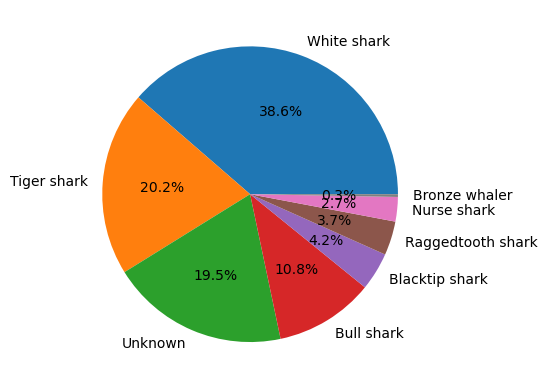

In [64]:
deadliest_sharks_df = shark_clean_data_df["Species_1"].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
deadliest_sharks_df

TypeError: no numeric data to plot

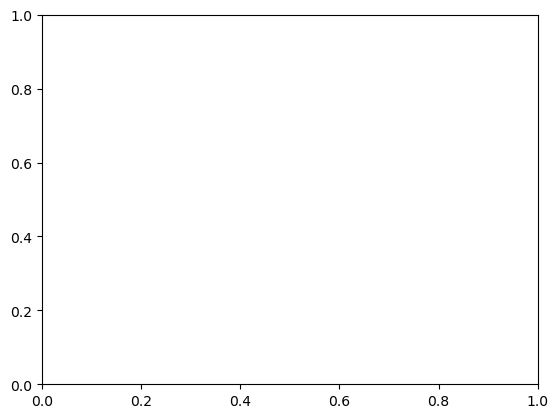

In [65]:
shark_clean_data_df = shark_clean_data_df[shark_clean_data_df.columns[-2:]]
fig, ax = plt.subplots(1,1)
shark_clean_data_df.plot(kind='bar', no='N', yes='Y')
ax.legend()
plt.show()

Text(0, 0.5, '')

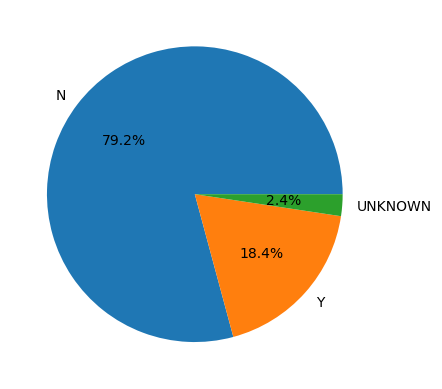

In [66]:
shark_clean_data_df["fatal_y_n"].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("") 
#ok

In [70]:
shark_clean_data_Geo_df = shark_clean_data_df[["country", "location","area"]]
shark_clean_data_Geo_df.head()


,country,location,area
0,USA,"Summerland Key, Monroe County",Florida
1,USA,"Deerfield Beach (near Boca Raton), Broward County",Florida
2,USA,"Vero Beach, Indian River County",Florida
3,BAHAMAS,Compass Cay,Exumas
4,USA,"Biscayne National Park, Miami",Florida


In [101]:
shark_clean_data_Geo_df['country'].value_counts().head()

country
USA             327
AUSTRALIA       139
SOUTH AFRICA    112
BAHAMAS          11
MEXICO           10
Name: count, dtype: int64

In [98]:
shark_clean_data_Geo_df.value_counts(["country", "area"])

country       area                 
USA           Florida                  129
              California                71
              Hawaii                    68
AUSTRALIA     New South Wales           56
SOUTH AFRICA  Western Cape Province     50
                                      ... 
IRAQ          Basrah                     1
HONG KONG     Port Shelter               1
GUAM          North Region               1
              Merizo                     1
VENEZUELA     Anzoategui                 1
Name: count, Length: 96, dtype: int64

In [99]:
Attack_per_country = shark_clean_data_Geo_df.groupby('country')

# Count how many times each road type appears in our group
Attack_per_country = Attack_per_country['country'].count()

Attack_per_country

country
AMERICAN SAMOA                      1
AUSTRALIA                         139
BAHAMAS                            11
BRAZIL                              7
BRITISH WEST INDIES                 1
COSTA RICA                          1
CROATIA                             2
CUBA                                2
FEDERATED STATES OF MICRONESIA      1
FIJI                                6
FRENCH POLYNESIA                    1
GREECE                              1
GUAM                                2
HONG KONG                           1
INDONESIA                           2
IRAQ                                2
ITALY                               2
JAMAICA                             2
MALDIVES                            1
MARSHALL ISLANDS                    1
MEXICO                             10
MOZAMBIQUE                          1
NEW CALEDONIA                       9
NEW ZEALAND                        10
OKINAWA                             1
PALAU                               1
PANA

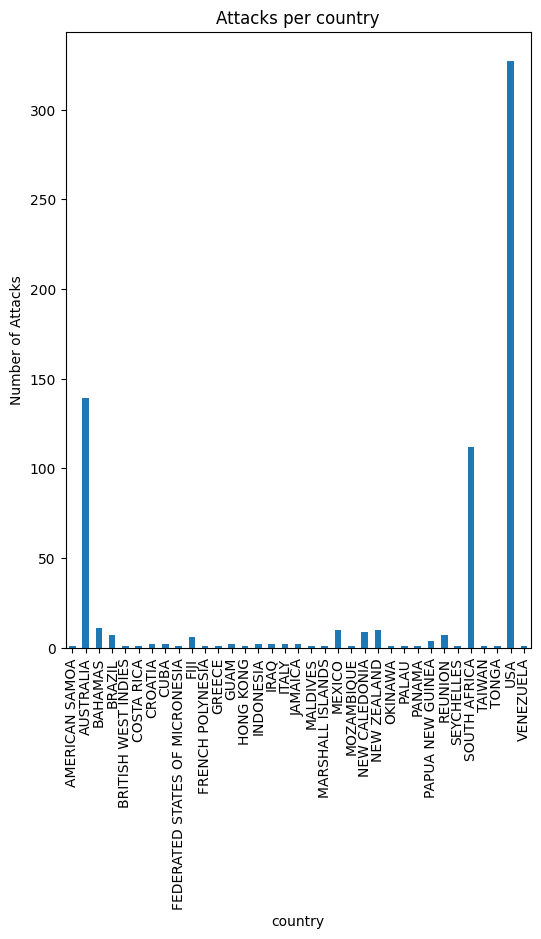

<Figure size 640x480 with 0 Axes>

In [90]:
count_chart = Attack_per_country.plot(kind='bar', figsize=(6,8), title="Attacks per country")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("country")
count_chart.set_ylabel("Number of Attacks")

plt.show()
plt.tight_layout()


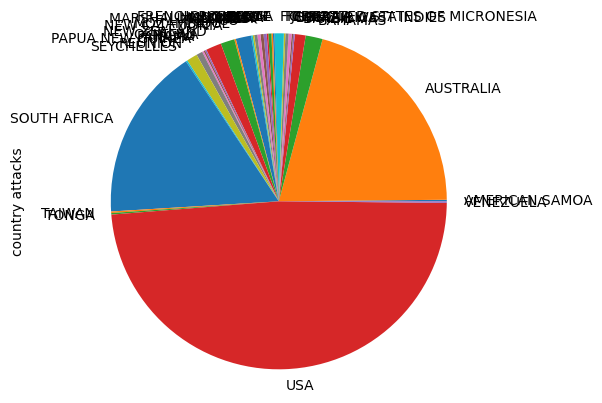

In [92]:
# Create a pie chart based upon the total checkouts (or loans) of that single branch
attack_pie = Attack_per_country.plot(kind="pie")
attack_pie.set_ylabel("country attacks")

plt.axis("equal")
plt.show()